# lec6 exploratory data analysis

In [1]:
import sys
import os
import pandas as pd
import numpy as np

In [2]:
cars_data=pd.read_csv('Toyota.csv',index_col=0,na_values=['??','????'])

In [3]:
cars_data2=cars_data.copy(deep=True)

In [4]:
pd.crosstab(index=cars_data2['FuelType'],#row
            columns='count', #col
            dropna=True)

col_0,count
FuelType,
CNG,15
Diesel,144
Petrol,1177


In [5]:
pd.crosstab(index=cars_data2['Automatic'],#0-manual ,1=automatic
            columns=cars_data2['FuelType'],
            dropna=True)

FuelType,CNG,Diesel,Petrol
Automatic,,,
0,15,144,1104
1,0,0,73


In [6]:
#joint probabilaty is the likelihood of two independent events happening at the same time
pd.crosstab(index=cars_data2['Automatic'],#0-manual ,1=automatic
            columns=cars_data2['FuelType'],
            normalize=True,#all the values to proposition or probability
            dropna   =True)

FuelType,CNG,Diesel,Petrol
Automatic,,,
0,0.011228,0.107784,0.826347
1,0.000000,0.000000,0.054641


In [7]:
#marginal probability is the probability of the occurrence of the single event
pd.crosstab(index=cars_data2['Automatic'],#0-manual ,1=automatic
            
            columns=cars_data2['FuelType'],
            normalize=True,#all the values to proposition or probability
            margins  =True, #sum of rows and columns
            dropna   =True)

FuelType,CNG,Diesel,Petrol,All
Automatic,,,,
0,0.011228,0.107784,0.826347,0.945359
1,0.000000,0.000000,0.054641,0.054641
All,0.011228,0.107784,0.880988,1.000000


In [8]:
#Conditional probability is the probability of an event ( A ), given that another event ( B ) has already occurred 
#Given the type of gear box, probability of different fuel type
pd.crosstab(index=cars_data2['Automatic'],#0-manual ,1=automatic 
            columns=cars_data2['FuelType'],
            margins  =True, #sum of rows and columns
            dropna   =True, #drop all nan values
            normalize='index') #index =1

FuelType,CNG,Diesel,Petrol
Automatic,,,
0,0.011876,0.114014,0.874109
1,0.000000,0.000000,1.000000
All,0.011228,0.107784,0.880988


In [9]:
#Conditional probability is the probability of an event ( A ), given that another event ( B ) has already occurred 
#Given the type of gear box, probability of different fuel type
pd.crosstab(index=cars_data2['Automatic'],#0-manual ,1=automatic 
            columns=cars_data2['FuelType'],
            margins  =True, #sum of rows and columns
            dropna   =True, #drop all nan values
            
            normalize='columns') #columns=1

FuelType,CNG,Diesel,Petrol,All
Automatic,,,,
0,1.0,1.0,0.937978,0.945359
1,0.0,0.0,0.062022,0.054641


In [10]:
numerical_data=cars_data2.select_dtypes(exclude=[object])
print(numerical_data.shape)


(1436, 8)


In [11]:
correlation=numerical_data.corr()
print(correlation)

              Price       Age        KM        HP  MetColor  Automatic  \
Price      1.000000 -0.878407 -0.574720  0.309902  0.112041   0.033081   
Age       -0.878407  1.000000  0.512735 -0.157904 -0.099659   0.032573   
KM        -0.574720  0.512735  1.000000 -0.335285 -0.093825  -0.081248   
HP         0.309902 -0.157904 -0.335285  1.000000  0.064749   0.013755   
MetColor   0.112041 -0.099659 -0.093825  0.064749  1.000000  -0.013973   
Automatic  0.033081  0.032573 -0.081248  0.013755 -0.013973   1.000000   
CC         0.165067 -0.120706  0.299993  0.053758  0.029189  -0.069321   
Weight     0.581198 -0.464299 -0.026271  0.086737  0.057142   0.057249   

                 CC    Weight  
Price      0.165067  0.581198  
Age       -0.120706 -0.464299  
KM         0.299993 -0.026271  
HP         0.053758  0.086737  
MetColor   0.029189  0.057142  
Automatic -0.069321  0.057249  
CC         1.000000  0.651450  
Weight     0.651450  1.000000  


# data visualization I

In [12]:
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
cars_data1=cars_data.copy(deep=True)

In [14]:
cars_data1.dropna(axis=0,inplace=True)

using matplot.pyplot as plt for visualization

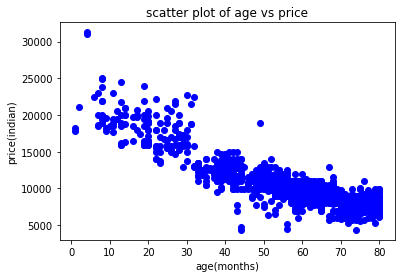

In [15]:
#scatterplot
plt.scatter(cars_data1['Age'],cars_data1['Price'],c='blue')
plt.title('scatter plot of age vs price')
plt.xlabel('age(months)')
plt.ylabel('price(indian)')
plt.show()


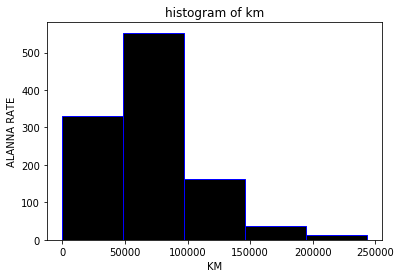

In [16]:
#histogram
plt.hist(cars_data1['KM'],
        color='black',
        edgecolor='blue',
        bins = 5)
plt.title('histogram of km')
plt.xlabel('KM')
plt.ylabel('ALANNA RATE')
plt.show()

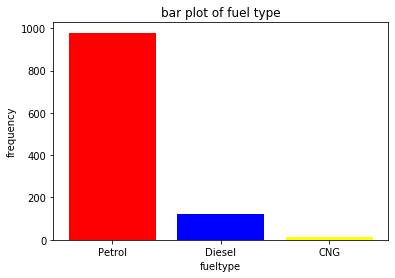

In [17]:
#BAR PLOT
counts  =[979,120,12]
fueltype=('Petrol','Diesel','CNG')

index   =np.arange(len(fueltype))

plt.bar(index,counts,color=['red','blue','yellow'])
plt.title('bar plot of fuel type')
plt.xlabel('fueltype')
plt.ylabel('frequency')

#for labelling petrol desel and cng
            #rowloc  label degree of rotation
plt.xticks(index,fueltype,rotation=360)
plt.show()       


# data visualization II

data visualization using seaborn 
scatter , histogram

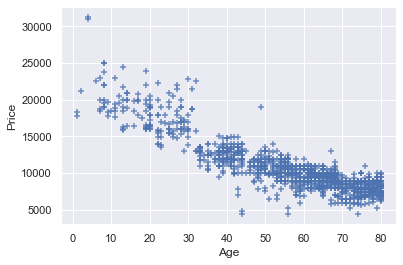

In [18]:
sns.set(style="darkgrid")
#sns.regplot(x=cars_data1['Age'],y=cars_data1['Price'])
#without regression
sns.regplot(x=cars_data1['Age'],
            y=cars_data1['Price'],
            marker="+",
            fit_reg=False)

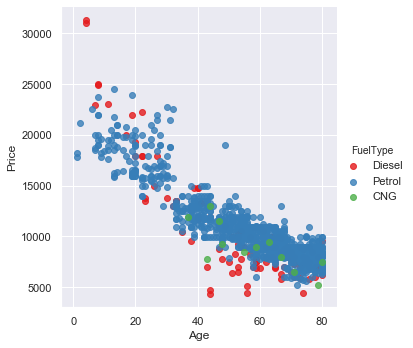

In [19]:
#price vs age by fueltype
sns.lmplot(x='Age',y='Price',data=cars_data1,fit_reg=False,
           hue='FuelType',legend=True,palette='Set1')

histogram

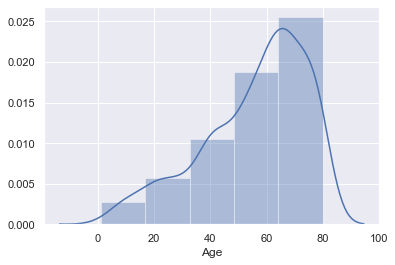

In [34]:
sns.distplot(cars_data1['Age'],kde=False,bins=5)
#                       kernel density estimate

bar plot

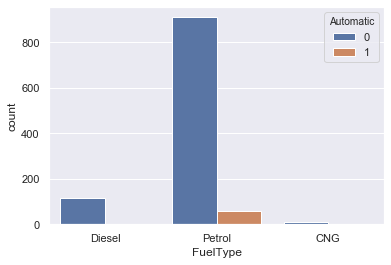

In [23]:
sns.countplot(x="FuelType",data=cars_data1,hue='Automatic')

Box and whiskers plot of Price to visually interpret the
five-number summary

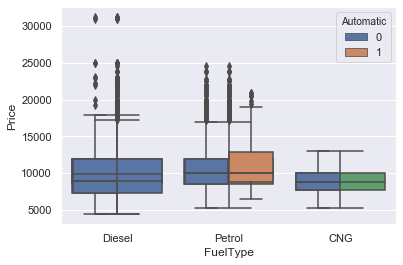

In [33]:
sns.boxplot(y=cars_data1['Price'])
sns.boxplot(x=cars_data1['FuelType'],y=cars_data1['Price'])
sns.boxplot(x=cars_data1['FuelType'],y=cars_data1['Price'],hue='Automatic',data=cars_data1)

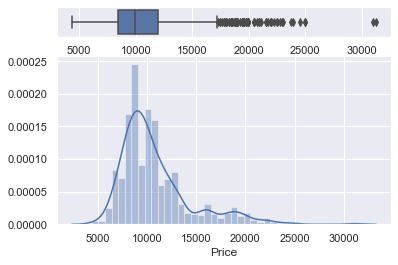

In [41]:
f,(ax_box,ax_hist)=plt.subplots(2,gridspec_kw={'height_ratios':(.15,.85)})
sns.boxplot(cars_data1['Price'], ax=ax_box)
sns.distplot(cars_data1['Price'], ax=ax_hist ,kde=False)

pair plot

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


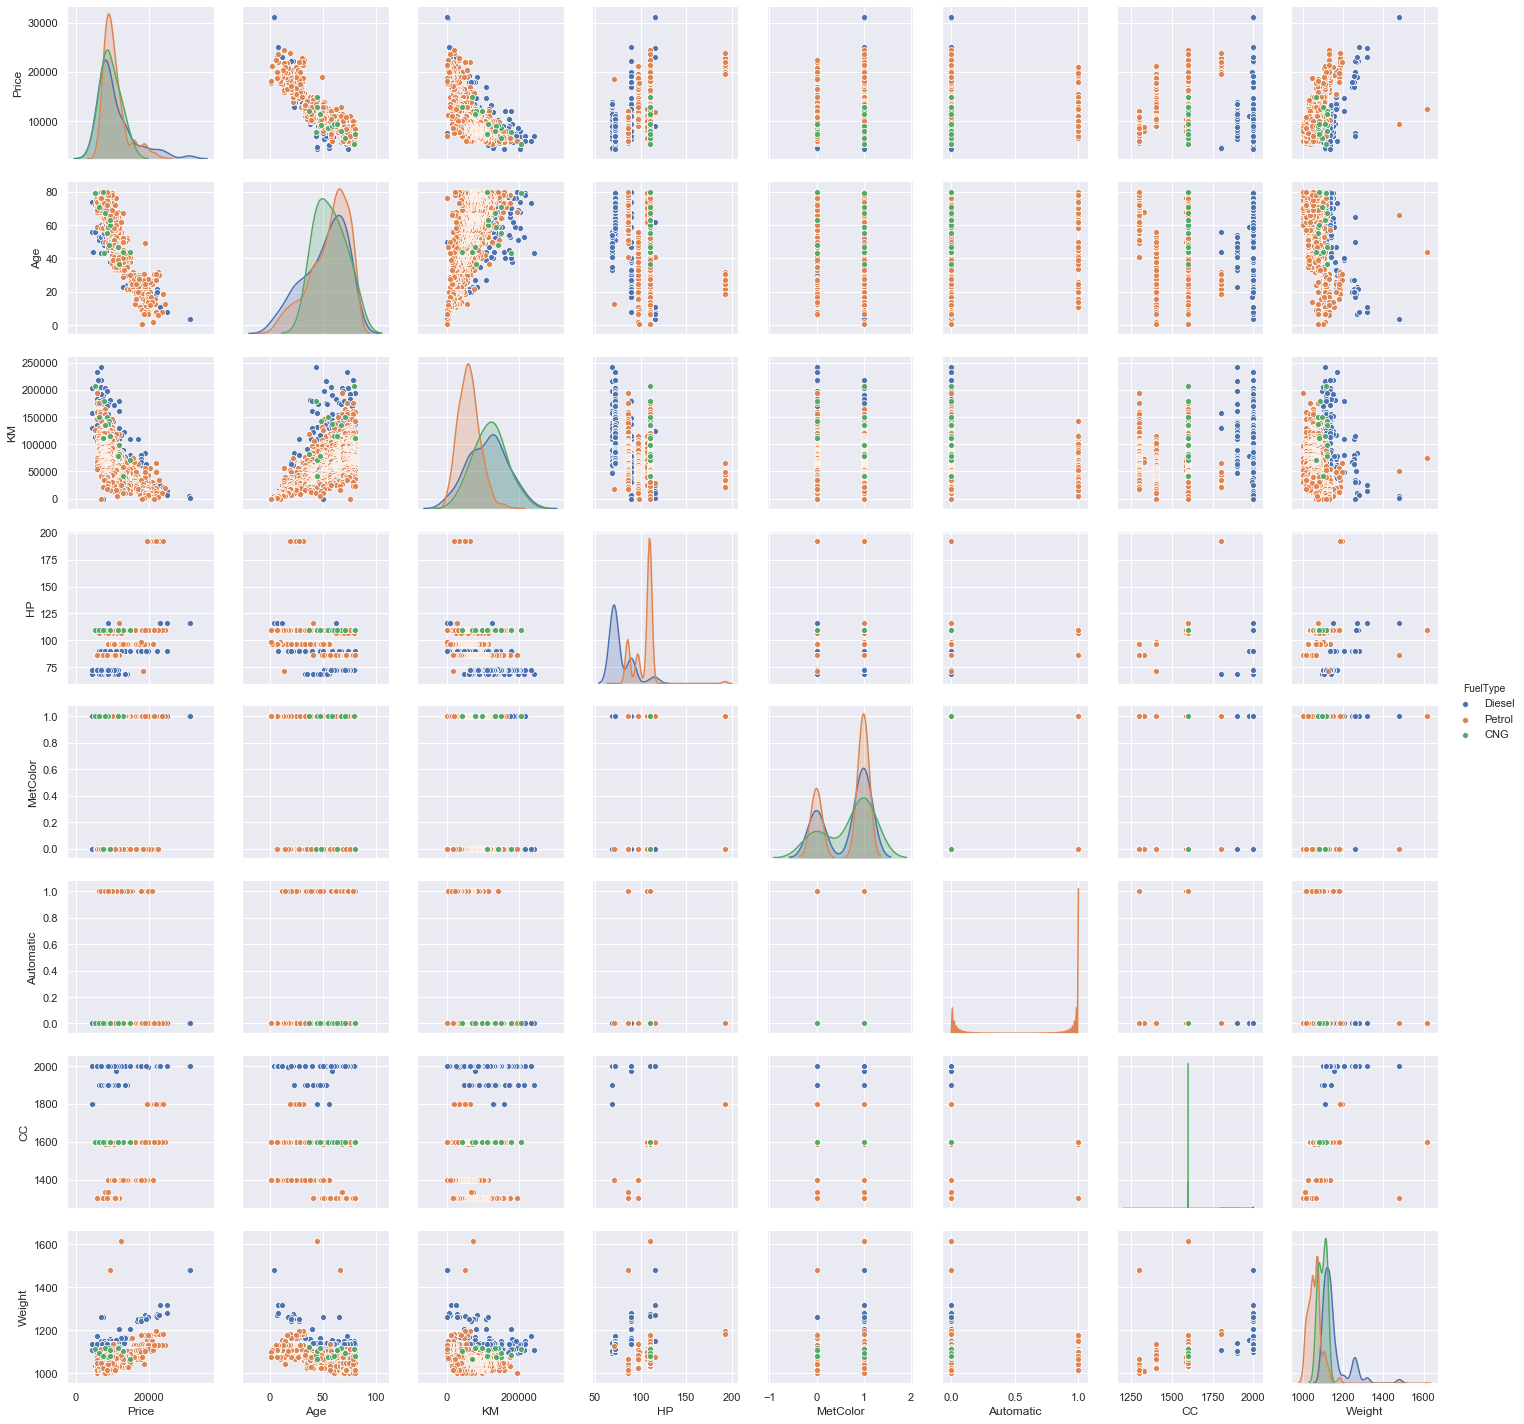

In [43]:
sns.pairplot(cars_data, kind="scatter", hue="FuelType")
plt.show()